In [1]:
import numpy as np
import pandas as pd

In [2]:
raw_data=pd.read_csv("Trump_username.csv")

In [3]:
raw_data.head()

,id,text,favorite_count,retweet_count,lang,source,created_y,created_m,created_d,created_h,created_min,coordinates
0,986994992177561600,Governor Jerry Brown announced he will deploy ...,14372,3892,en,Twitter for iPhone,2018,4,19,15,48,NaN
1,986988633822412800,Thank you San Diego County for defending the r...,23917,5945,en,Twitter for iPhone,2018,4,19,15,23,NaN
2,986979039670931458,Great meeting with Prime Minister Abe of Japan...,28660,6273,en,Twitter for iPhone,2018,4,19,14,45,NaN
3,986801143014621185,It was my great honor to host my friend @JPN_P...,48248,11496,en,Twitter for iPhone,2018,4,19,2,58,NaN
4,986789533172760576,.@POTUS Trump thanks Prime Minister @AbeShinzo...,0,5670,en,Twitter for iPhone,2018,4,19,2,12,NaN


In [4]:
from nltk.tokenize import word_tokenize
import nltk

In [5]:
import re

In [6]:
from nltk.stem.porter import PorterStemmer

In [8]:
def improve_bag(mybag, mystring,pattern=re.compile(r'[a-zA-Z]{2,}'),stopwords=set(nltk.corpus.stopwords.words('english')),
               stemming=True):
    
    #find all words with more than 2 characters
    mylist=pattern.findall(mystring)
    
    #filter using stopwords
    for i in range(len(mylist)):
        mylist[i]=mylist[i].lower()
    new_bag=[word for word in mylist if word not in stopwords]
    
    #do stemming if the stemming parameter is True
    if stemming == True:
        porter_stemmer = PorterStemmer()
        for i in range(len(new_bag)):
            new_bag[i]=porter_stemmer.stem(new_bag[i])
    
    #update our word bag
    for i in new_bag:
        if i in mybag:
            mybag[i]+=1
        else:
            mybag[i]=1

In [9]:
def build_bag(mybag, tweetset,pattern=re.compile(r'[a-zA-Z]{2,}'),stopwords=set(nltk.corpus.stopwords.words('english')),
               stemming=True):
    print("Before update, my bag has ", len(mybag), " words")
    
    N=tweetset.shape[0]
    
    for i in range(N):
        improve_bag(mybag, tweetset.loc[i,"text"],pattern=re.compile(r'[a-zA-Z]{2,}'),
                          stopwords=set(nltk.corpus.stopwords.words('english')),
                          stemming=stemming)
    
    print("After update, my bag has ", len(mybag), " words")

In [1]:
import pickle

In [14]:
my_bag={}
build_bag(my_bag, raw_data,pattern=re.compile(r'[a-zA-Z]{2,}'),stopwords=set(nltk.corpus.stopwords.words('english')),
               stemming=True)

Before update, my bag has  0  words
After update, my bag has  6848  words


In [19]:
fw=open("word_bag.txt","wb")
pickle.dump(my_bag, fw)
fw.close()

In [20]:
fr = open('word_bag.txt','rb')  
data1 = pickle.load(fr)

In [25]:
len(my_bag)

6848

In [22]:
fr.close()

In [23]:
#Here is the user name of some famous twitter account that investors should follow.
newsDict={
    'CNBC':'CNBC',
    'StockTwits':'StockTwits',
    'WSJ':'WSJMarkets',
    'Benzinga.com':'Benzinga',
}
peopleDict={
    'Carl Icahn':'Carl_C_Icahn',
    'John Carney':'carney',
    'Stephanie Link':'Stephanie_Link',
    'Jim Cramer':'jimcramer',
    'Jeffrey Gundlach':'TruthGundlach',
    'Mohamed A. El-Erian':'elerianm',
    'Joseph A. LaVorgna':'Lavorgnanomics',
}
instituteDict={
    'Federal Reserve Bank of St.Louis':'stlouisfed',
    'Bespoke Investment Group':'bespokeinvest',
    'Morgan Stanley':'MorganStanley',
    'Muddy Water Research':'muddywatersre',
}

In [26]:
for i in newsDict.values():
    temp_data=pd.read_csv(i+"_username.csv")
    build_bag(my_bag, temp_data,pattern=re.compile(r'[a-zA-Z]{2,}'),stopwords=set(nltk.corpus.stopwords.words('english')),
               stemming=True)

Before update, my bag has  6848  words
After update, my bag has  13216  words
Before update, my bag has  13216  words
After update, my bag has  19432  words
Before update, my bag has  19432  words
After update, my bag has  24375  words
Before update, my bag has  24375  words
After update, my bag has  29738  words


In [27]:
for i in peopleDict.values():
    temp_data=pd.read_csv(i+"_username.csv")
    build_bag(my_bag, temp_data,pattern=re.compile(r'[a-zA-Z]{2,}'),stopwords=set(nltk.corpus.stopwords.words('english')),
               stemming=True)

Before update, my bag has  29738  words
After update, my bag has  30138  words
Before update, my bag has  30138  words
After update, my bag has  30249  words
Before update, my bag has  30249  words
After update, my bag has  32244  words
Before update, my bag has  32244  words
After update, my bag has  36392  words
Before update, my bag has  36392  words
After update, my bag has  36574  words
Before update, my bag has  36574  words
After update, my bag has  41779  words
Before update, my bag has  41779  words
After update, my bag has  42609  words


In [28]:
for i in instituteDict.values():
    temp_data=pd.read_csv(i+"_username.csv")
    build_bag(my_bag, temp_data,pattern=re.compile(r'[a-zA-Z]{2,}'),stopwords=set(nltk.corpus.stopwords.words('english')),
               stemming=True)

Before update, my bag has  42609  words
After update, my bag has  49264  words
Before update, my bag has  49264  words
After update, my bag has  52760  words
Before update, my bag has  52760  words
After update, my bag has  58719  words
Before update, my bag has  58719  words
After update, my bag has  60619  words


In [30]:
frequence_list=list(my_bag.values())

In [31]:
import matplotlib.pyplot as plt

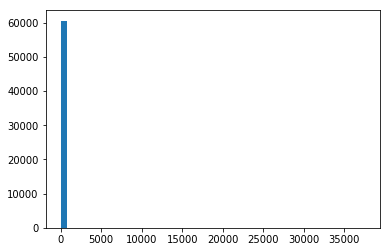

In [34]:
plt.hist(frequence_list,bins=50)
plt.show()

In [35]:
sorted_bag=sorted(my_bag.items(),key=lambda x:x[1], reverse=True)

In [36]:
sorted_bag[:50]

[('co', 37617),
 ('http', 37424),
 ('market', 4016),
 ('amp', 3516),
 ('year', 2962),
 ('via', 2818),
 ('stock', 2587),
 ('fed', 2085),
 ('today', 1903),
 ('week', 1896),
 ('new', 1876),
 ('vs', 1746),
 ('trade', 1743),
 ('say', 1720),
 ('rate', 1658),
 ('report', 1630),
 ('us', 1591),
 ('time', 1565),
 ('get', 1523),
 ('economi', 1511),
 ('one', 1480),
 ('day', 1452),
 ('like', 1448),
 ('sinc', 1432),
 ('growth', 1379),
 ('price', 1351),
 ('earn', 1338),
 ('investor', 1320),
 ('look', 1304),
 ('last', 1302),
 ('see', 1293),
 ('invest', 1199),
 ('make', 1191),
 ('gt', 1152),
 ('compani', 1146),
 ('great', 1130),
 ('expect', 1089),
 ('high', 1085),
 ('bank', 1075),
 ('good', 1048),
 ('go', 1035),
 ('month', 1032),
 ('data', 1017),
 ('econom', 1014),
 ('china', 988),
 ('could', 959),
 ('job', 951),
 ('sale', 939),
 ('busi', 920),
 ('big', 915)]

In [38]:
fw=open("word_bag.txt","wb")
pickle.dump(my_bag, fw)
fw.close()

In [39]:
fw=open("sorted_bag.txt","wb")
pickle.dump(sorted_bag, fw)
fw.close()

In [41]:
nostem_bag={}
for i in newsDict.values():
    temp_data=pd.read_csv(i+"_username.csv")
    build_bag(nostem_bag, temp_data,pattern=re.compile(r'[a-zA-Z]{2,}'),stopwords=set(nltk.corpus.stopwords.words('english')),
               stemming=False)

Before update, my bag has  0  words
After update, my bag has  10295  words
Before update, my bag has  10295  words
After update, my bag has  17510  words
Before update, my bag has  17510  words
After update, my bag has  23467  words
Before update, my bag has  23467  words
After update, my bag has  29627  words


In [42]:
for i in peopleDict.values():
    temp_data=pd.read_csv(i+"_username.csv")
    build_bag(nostem_bag, temp_data,pattern=re.compile(r'[a-zA-Z]{2,}'),stopwords=set(nltk.corpus.stopwords.words('english')),
               stemming=False)

Before update, my bag has  29627  words
After update, my bag has  30161  words
Before update, my bag has  30161  words
After update, my bag has  30312  words
Before update, my bag has  30312  words
After update, my bag has  32884  words
Before update, my bag has  32884  words
After update, my bag has  37797  words
Before update, my bag has  37797  words
After update, my bag has  38066  words
Before update, my bag has  38066  words
After update, my bag has  44345  words
Before update, my bag has  44345  words
After update, my bag has  45460  words


In [43]:
for i in instituteDict.values():
    temp_data=pd.read_csv(i+"_username.csv")
    build_bag(nostem_bag, temp_data,pattern=re.compile(r'[a-zA-Z]{2,}'),stopwords=set(nltk.corpus.stopwords.words('english')),
               stemming=False)

Before update, my bag has  45460  words
After update, my bag has  52513  words
Before update, my bag has  52513  words
After update, my bag has  56300  words
Before update, my bag has  56300  words
After update, my bag has  62765  words
Before update, my bag has  62765  words
After update, my bag has  65192  words


In [44]:
sorted_nostem_bag=sorted(nostem_bag.items(),key=lambda x:x[1], reverse=True)

In [45]:
sorted_nostem_bag[:50]

[('co', 36174),
 ('https', 35229),
 ('amp', 2944),
 ('via', 2807),
 ('fed', 2074),
 ('market', 2026),
 ('year', 1975),
 ('markets', 1908),
 ('vs', 1741),
 ('new', 1727),
 ('today', 1683),
 ('week', 1657),
 ('stocks', 1596),
 ('us', 1497),
 ('economy', 1405),
 ('since', 1374),
 ('growth', 1361),
 ('one', 1312),
 ('says', 1288),
 ('earnings', 1230),
 ('last', 1201),
 ('time', 1166),
 ('gt', 1149),
 ('investors', 1071),
 ('data', 1014),
 ('see', 963),
 ('rate', 955),
 ('like', 937),
 ('stock', 923),
 ('could', 922),
 ('china', 917),
 ('get', 900),
 ('may', 881),
 ('day', 879),
 ('sales', 869),
 ('economic', 845),
 ('est', 829),
 ('wsj', 801),
 ('good', 793),
 ('http', 782),
 ('right', 775),
 ('financial', 772),
 ('first', 760),
 ('trade', 759),
 ('business', 758),
 ('years', 749),
 ('billion', 748),
 ('gdp', 738),
 ('report', 727),
 ('inflation', 718)]

In [50]:
my_bag['inflat']

721

In [51]:
fw=open("nostem_bag.txt","wb")
pickle.dump(nostem_bag, fw)
fw.close()

In [53]:
fw=open("sorted_nostembag.txt","wb")
pickle.dump(sorted_nostem_bag, fw)
fw.close()

In [2]:
fr = open('sorted_bag.txt','rb')  
data1 = pickle.load(fr)

In [14]:
data1[900:1000]

[('hand', 102),
 ('brexit', 102),
 ('spotifi', 102),
 ('btfd', 102),
 ('banker', 102),
 ('jolt', 102),
 ('chairman', 101),
 ('lie', 101),
 ('kind', 101),
 ('competit', 101),
 ('bigger', 101),
 ('schedul', 101),
 ('paper', 101),
 ('standard', 101),
 ('tv', 101),
 ('row', 101),
 ('macro', 101),
 ('block', 100),
 ('six', 100),
 ('cb', 100),
 ('remark', 100),
 ('produc', 100),
 ('ratio', 100),
 ('role', 100),
 ('peopleatm', 100),
 ('word', 99),
 ('usa', 99),
 ('replac', 99),
 ('bit', 99),
 ('insid', 99),
 ('hk', 99),
 ('maker', 99),
 ('sep', 99),
 ('fbi', 98),
 ('enjoy', 98),
 ('process', 98),
 ('giant', 98),
 ('easi', 98),
 ('rd', 98),
 ('though', 98),
 ('coupl', 98),
 ('russian', 98),
 ('examin', 98),
 ('bottom', 98),
 ('reserv', 98),
 ('attack', 97),
 ('teacher', 97),
 ('squawkcnbc', 97),
 ('ticket', 97),
 ('asia', 97),
 ('jmackin', 97),
 ('pce', 97),
 ('men', 96),
 ('critic', 96),
 ('chanc', 96),
 ('beyond', 96),
 ('page', 96),
 ('space', 96),
 ('mayb', 96),
 ('divers', 96),
 ('nyc', 9

In [19]:
selected_data=[i[0] for i in data1[:1000]]

In [21]:
fw=open("selected_wordbag.txt","wb")
pickle.dump(selected_data, fw)
fw.close()